In [1]:
# k-평균 알고리즘

In [2]:
# 1. 데이터 준비하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fruits = pd.read
fruit = np.load('../datafiles/fruits_300.npy')
fruit_2d = fruit.reshape(-1, 100*100)
print(fruit.shape)

(300, 100, 100)


In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruit_2d)
print(km.labels_)
print(np.unique(km.labels_, return_counts=True))

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


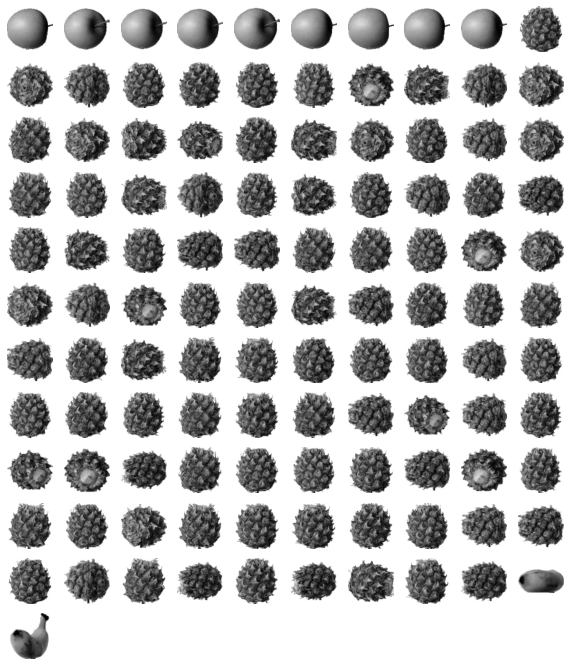

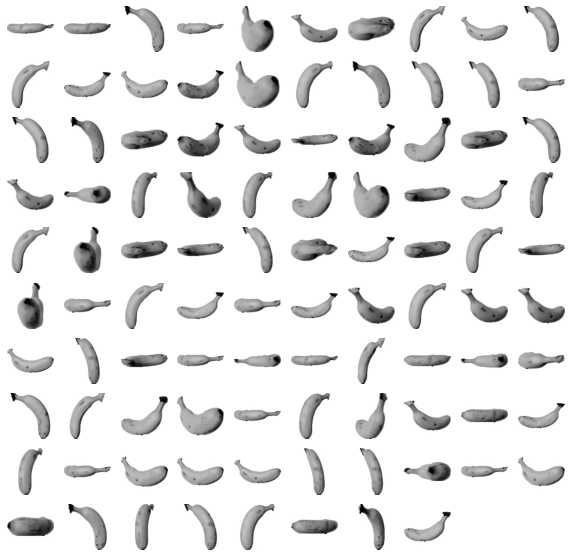

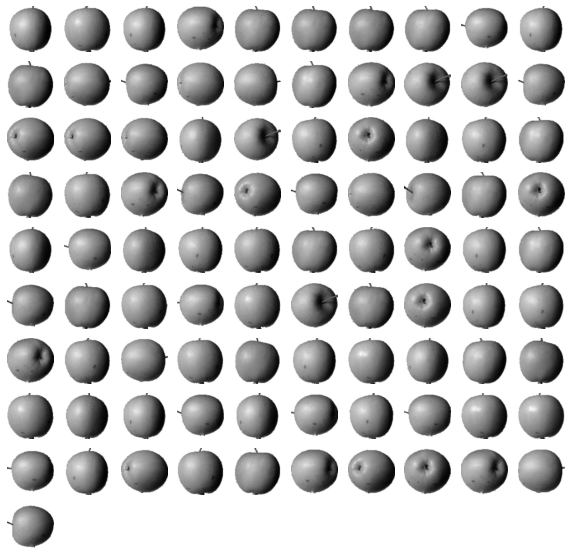

In [4]:
# 데이터 시각화
import matplotlib.pyplot as plt
def draw_fruit(arr, ratio=1):
    n = len(arr) # n = 샘플계수
    # 한줄에 10개씩 샘플 그리기
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수, 그렇지 않다면 10개
    columns = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, columns, figsize=(columns*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(columns):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruit(fruit[km.labels_==0])
draw_fruit(fruit[km.labels_==1])
draw_fruit(fruit[km.labels_==2])

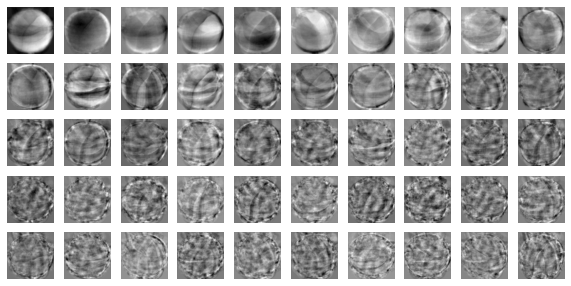

(300, 50)


In [5]:
# PCA 클래스
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruit_2d)

# 100x100 이미지 나타내기
draw_fruit(pca.components_.reshape(-1, 100, 100))

fruit_pca = pca.transform(fruit_2d)
print(fruit_pca.shape)

(300, 10000)


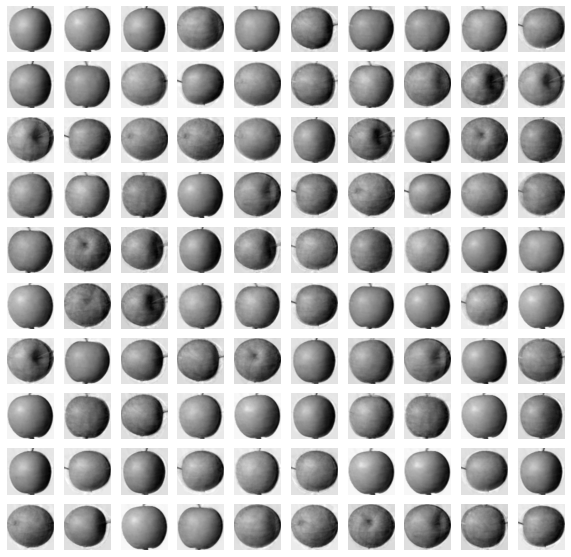

/n


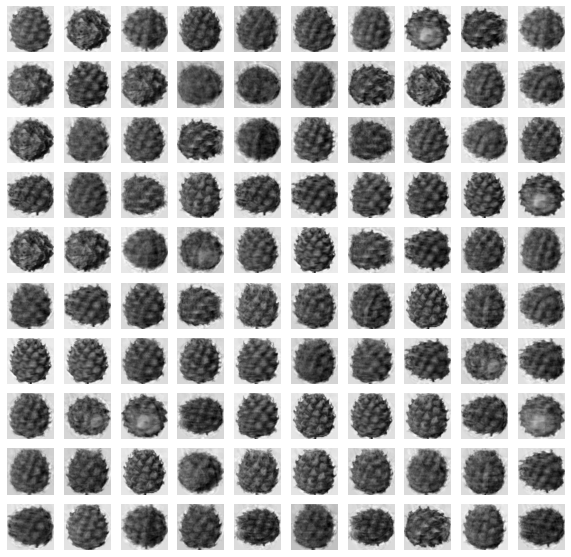

/n


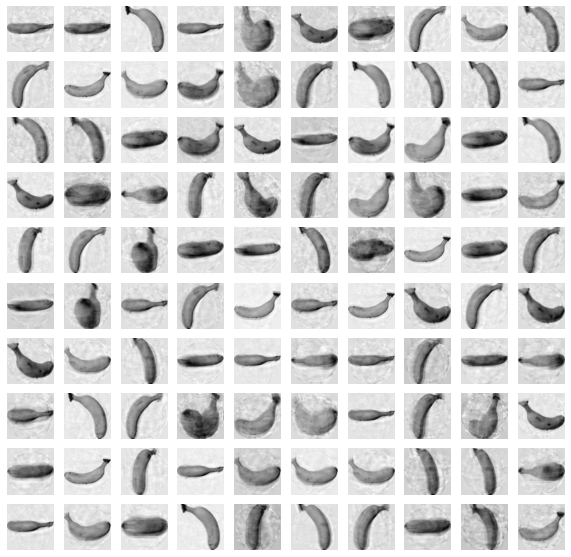

/n


In [6]:
# 원본데이터 구성
fruit_inverse = pca.inverse_transform(fruit_pca)
print(fruit_inverse.shape)

fruit_reconstruct = fruit_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruit(fruit_reconstruct[start:start+100])
    print("/n")

0.9215534861177019


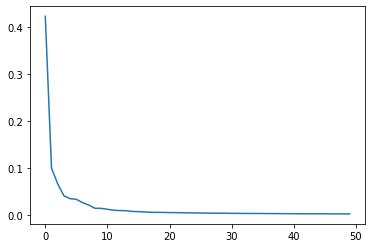

In [7]:
# 설명된 분산 = 주성분 데이터 분산 나타내기
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [9]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

In [12]:
from sklearn.model_selection import cross_validate
# 원본데이터
score = cross_validate(lr, fruit_2d, target) 
print(np.mean(score['test_score']))
print(np.mean(score['fit_time']))

# 50개 특성만 사용
print(np.mean(score['test_score']))
score = cross_validate(lr, fruit_pca, target) 
print(np.mean(score['test_score']))
print(np.mean(score['fit_time']))

0.9966666666666667
1.103058433532715
0.9966666666666667
1.0
0.09112391471862794


In [19]:
pca = PCA(n_components=0.5)
pca.fit(fruit_2d)

print(pca.n_components_)

2


In [20]:
fruit_pca = pca.transform(fruit_2d)
print(fruit_pca.shape)

(300, 2)


In [22]:
score = cross_validate(lr, fruit_pca, target)
print(np.mean(score['test_score']))
print(np.mean(score['fit_time']))

C:\ProgramData\Miniconda3\envs\kwonjh\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Miniconda3\envs\kwonjh\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

0.99
0.06384258270263672


C:\ProgramData\Miniconda3\envs\kwonjh\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruit_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


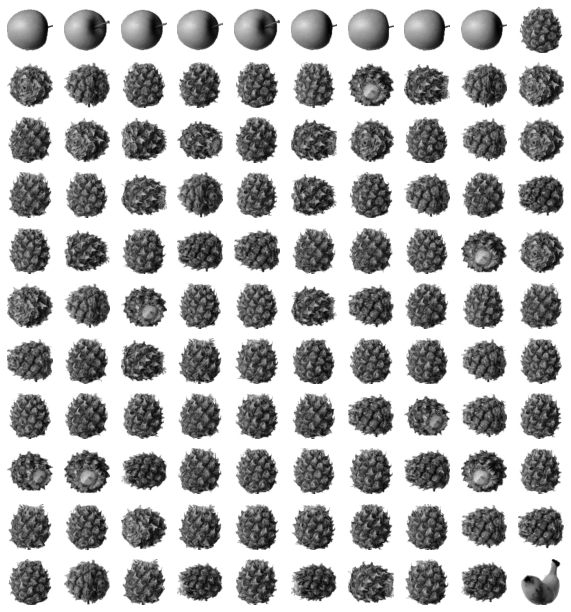

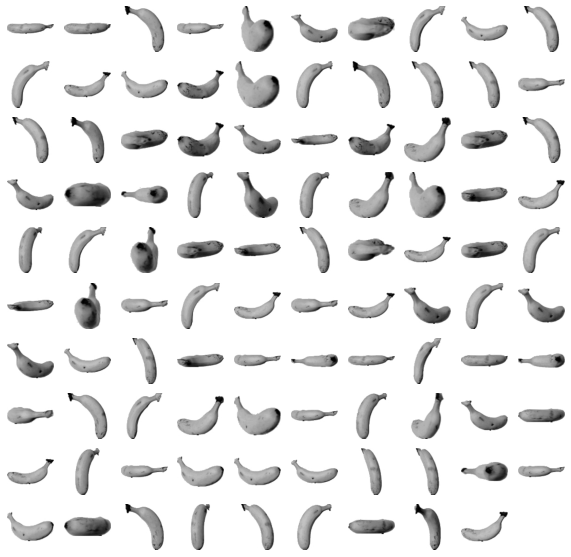

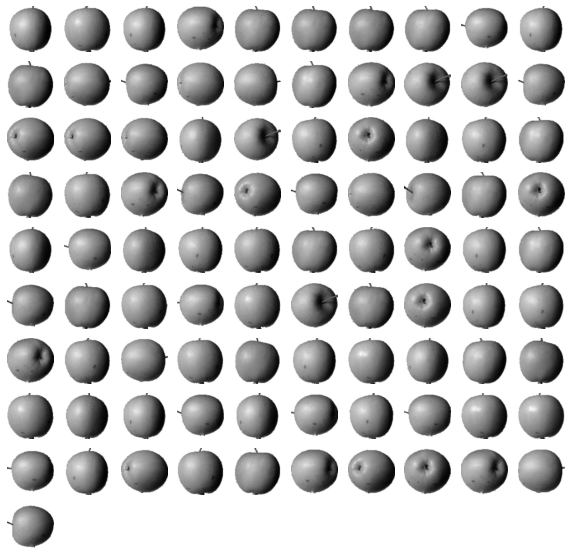

In [27]:
for label in range(0,3):
    draw_fruit(fruit[km.labels_ == label])
    print("\n")

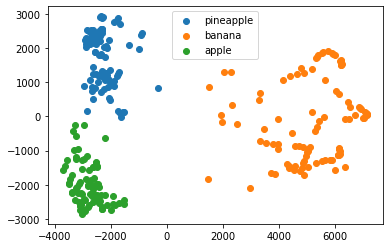

In [29]:
# 사과, 파인애플, 바나나 산점도 그리기

for label in range(0,3):
    data = fruit_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()